# Sabah Anwar Azmi | sabahazmi@live.com

## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle

## Data

In [2]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('Fraud.csv')

In [3]:
# first 5 rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# checking the number of missing values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

This Dataset is imbalanced

In [8]:
# separating the data for analysis
legit = df[df.isFraud == 0]
fraud = df[df.isFraud == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [10]:
# statistical measures of the data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [11]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [12]:
# compare the values for both transactions
df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


## Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#### Number of Fraudulent Transactions = 492

In [13]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4131174,302,CASH_IN,94776.54,C668776003,12952172.07,13046948.61,C1831866680,7593224.26,7498447.72,0,0
4140284,303,CASH_OUT,77240.18,C1034290568,0.00,0.00,C680659635,2786817.73,2864057.91,0,0
3721739,278,CASH_IN,286140.84,C662562102,20966.00,307106.84,C1937721430,3299618.20,3013477.36,0,0
1066701,120,PAYMENT,2575.08,C830143052,159864.00,157288.92,M365500681,0.00,0.00,0,0
4998181,353,TRANSFER,915414.50,C592883605,6094.00,0.00,C1952742190,1037628.01,1953042.51,0,0


In [16]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [17]:
new_dataset['isFraud'].value_counts()

1    8213
0     492
Name: isFraud, dtype: int64

In [18]:
new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,247.280488,1.734448e+05,8.885707e+05,909564.263130,962644.838841,1.073524e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,544249.619075,1.279708e+06,0.001948


In [19]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4131174,302,CASH_IN,94776.54,C668776003,12952172.07,13046948.61,C1831866680,7593224.26,7498447.72,0,0
4140284,303,CASH_OUT,77240.18,C1034290568,0.00,0.00,C680659635,2786817.73,2864057.91,0,0
3721739,278,CASH_IN,286140.84,C662562102,20966.00,307106.84,C1937721430,3299618.20,3013477.36,0,0
1066701,120,PAYMENT,2575.08,C830143052,159864.00,157288.92,M365500681,0.00,0.00,0,0
4998181,353,TRANSFER,915414.50,C592883605,6094.00,0.00,C1952742190,1037628.01,1953042.51,0,0


In [20]:
new_dataset['nameOrig'].value_counts()

C1048484553    1
C848070944     1
C1199258183    1
C1325096505    1
C1687063682    1
              ..
C2134666226    1
C602497337     1
C809683747     1
C1321273727    1
C399364024     1
Name: nameOrig, Length: 8705, dtype: int64

## Label Encoding

In [21]:
le = preprocessing.LabelEncoder()

new_dataset['type'] = le.fit_transform(new_dataset['type'])
new_dataset['nameOrig'] = le.fit_transform(new_dataset['nameOrig'])
new_dataset['nameDest'] = le.fit_transform(new_dataset['nameDest'])


In [22]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4131174,302,0,94776.54,7192,12952172.07,13046948.61,3610,7593224.26,7498447.72,0,0
4140284,303,1,77240.18,156,0.00,0.00,7111,2786817.73,2864057.91,0,0
3721739,278,0,286140.84,7160,20966.00,307106.84,4084,3299618.20,3013477.36,0,0
1066701,120,3,2575.08,7928,159864.00,157288.92,8603,0.00,0.00,0,0
4998181,353,4,915414.50,6866,6094.00,0.00,4139,1037628.01,1953042.51,0,0


## Splitting the data into Features & Targets

In [23]:
X = new_dataset.drop(columns=['isFraud','type','nameOrig','nameDest'], axis=1)
Y = new_dataset['isFraud']

In [24]:
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
4131174   302    94776.54    12952172.07     13046948.61      7593224.26   
4140284   303    77240.18           0.00            0.00      2786817.73   
3721739   278   286140.84       20966.00       307106.84      3299618.20   
1066701   120     2575.08      159864.00       157288.92            0.00   
4998181   353   915414.50        6094.00            0.00      1037628.01   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFlaggedFraud  
4131174      7498447.72               0  
414

In [25]:
print(Y)

4131174    0
4140284    0
3721739    0
1066701    0
4998181    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 8705, dtype: int64


## Split the data into Training data & Testing Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(8705, 7) (6964, 7) (1741, 7)


## Models

In [28]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          GaussianNB(),
          BernoulliNB(),
          MultinomialNB(),
          SVC(kernel = 'poly'),
          SVC(kernel = 'rbf'),
          SVC(kernel = 'sigmoid'),
          ]

## Training

In [29]:
train_accuracy = []
test_accuracy = []
for model in models:
    # training the Model
    model.fit(X_train, Y_train)
    # accuracy on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracy.append(training_data_accuracy * 100)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    test_accuracy.append(training_data_accuracy * 100)

LogisticRegression()
Accuracy on Training data :  0.9593624353819644
Accuracy score on Test Data :  0.9655370476737507
----------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9971280873061459
----------------------------------------------------------------------
KNeighborsClassifier()
Accuracy on Training data :  0.9820505456634119
Accuracy score on Test Data :  0.9787478460654796
----------------------------------------------------------------------
GaussianNB()
Accuracy on Training data :  0.8261056863871339
Accuracy score on Test Data :  0.8374497415278576
----------------------------------------------------------------------
BernoulliNB()
Accuracy on Training data :  0.9711372774267663
Accuracy score on Test Data :  0.9770246984491672
----------------------------------------------------------------------
MultinomialNB()
Accuracy on Training data :  0.8584147041929925
Accuracy s

In [30]:
data = pd.DataFrame()
data['Model'] = models
data['Train Score'] = train_accuracy
data['Test Score'] = test_accuracy
data.head(10)

,Model,Train Score,Test Score
0,LogisticRegression(),95.936244,95.936244
1,DecisionTreeClassifier(),100.000000,100.000000
2,KNeighborsClassifier(),98.205055,98.205055
3,GaussianNB(),82.610569,82.610569
4,BernoulliNB(),97.113728,97.113728
5,MultinomialNB(),85.841470,85.841470
6,SVC(kernel='poly'),94.715681,94.715681
7,SVC(),95.002872,95.002872
8,SVC(kernel='sigmoid'),93.107410,93.107410


## Data Visualization

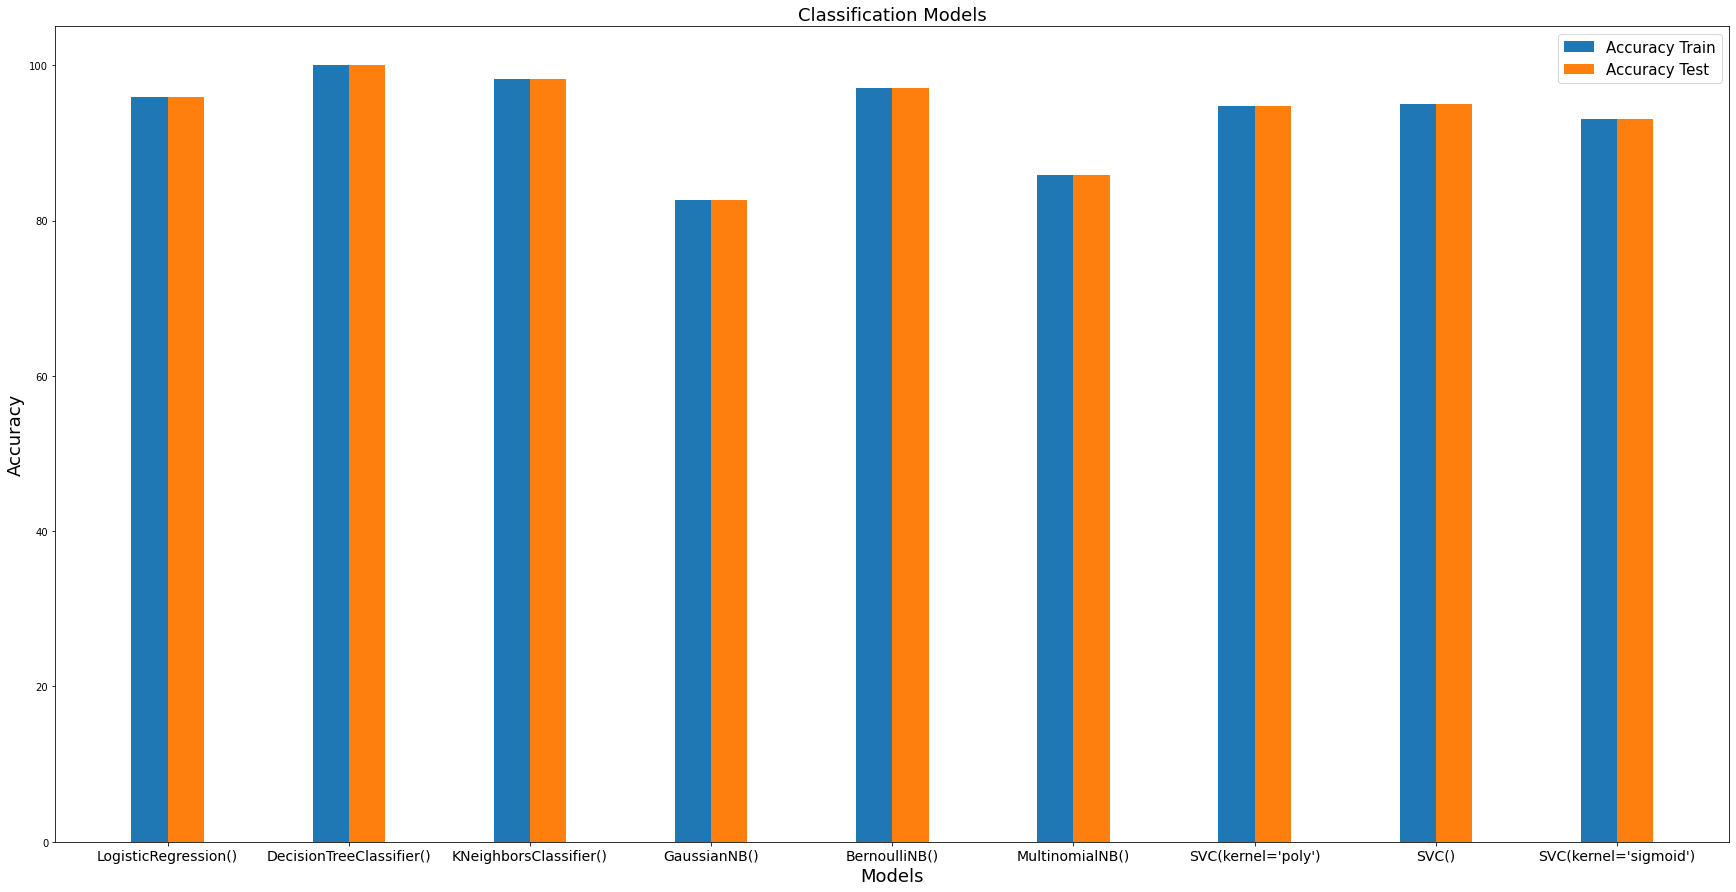

In [31]:
plt.figure(figsize = (30, 15))
w = 0.2
bar1 = np.arange(len(models))
bar2 = [i+w for i in bar1]

plt.bar(bar1, train_accuracy, w, label = 'Accuracy Train')
plt.bar(bar2, test_accuracy, w, label = 'Accuracy Test')

plt.xlabel("Models", fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.title('Classification Models', fontsize = 18)
plt.xticks(bar1+w/2, models, fontsize = 14)
plt.legend(fontsize = 15)
plt.show()

### From the above graph it is clear that the best performing model is DecisionTree.

In [45]:
bestmodel = DecisionTreeClassifier()
best_model

DecisionTreeClassifier()

### Saving best model in .sav file

In [32]:
filename = 'best_model.sav'
pickle.dump(bestmodel, open(filename, 'wb'))

In [40]:
best_model = pickle.load(open(filename, 'rb'))
best_model

DecisionTreeClassifier()